## Set Up

### Import Library


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/loanCredit/loan_data_2007_2014.csv')

<ipython-input-3-9c31b375122a>:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/dataset/loanCredit/loan_data_2007_2014.csv')


## Data Understanding

In [4]:
# Gaining information
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# To see dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

We can check the statistical summary or description of this dataset using describe() method from pandas library.

In [6]:
# Check the statistic summary
print("Statistics summary:")
df.describe()

Statistics summary:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


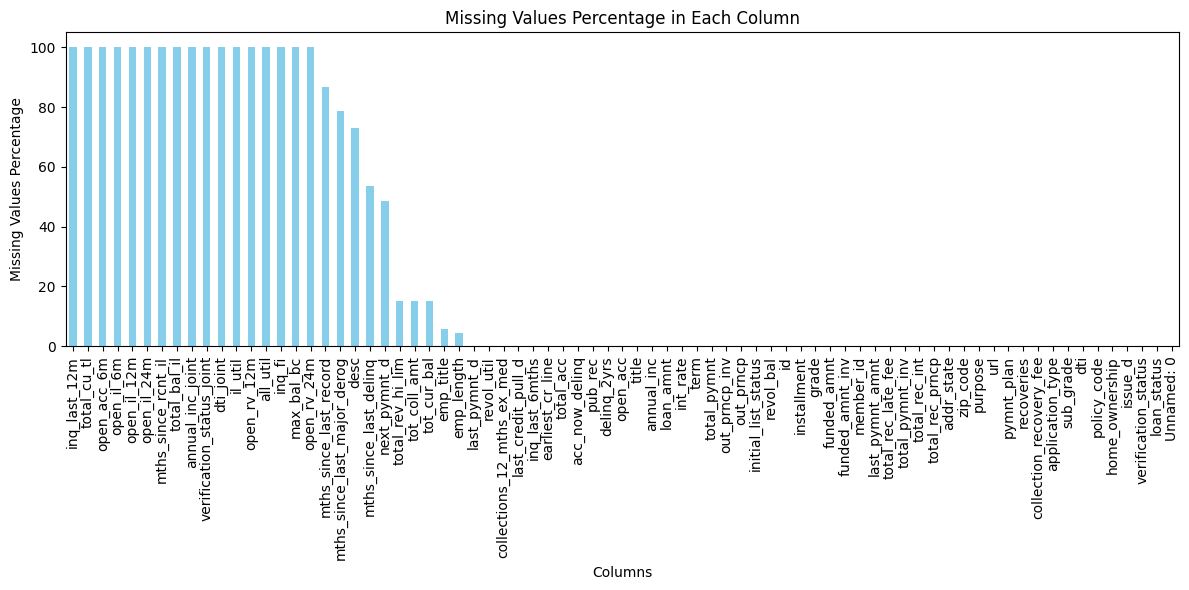

In [7]:
# Checking the amount of missing values
missing_values_count = df.isnull().sum().sort_values(ascending = False)

total_col = len(df)
missing_values_percentage = missing_values_count / total_col * 100

plt.figure(figsize=(12, 6))
missing_values_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Missing Values Percentage')
plt.title('Missing Values Percentage in Each Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
# Check how many zero values exist in numerical columns
zero_counts = (df.select_dtypes(include=['number']) == 0).sum()

# Display only columns where zero values exist
zero_counts = zero_counts[zero_counts > 0]

print("Columns with zero values that might indicate missing data:")
print(zero_counts)

Columns with zero values that might indicate missing data:
Unnamed: 0                          1
funded_amnt_inv                   233
dti                               363
delinq_2yrs                    382954
inq_last_6mths                 241498
mths_since_last_delinq           1223
mths_since_last_record           1278
open_acc                            7
pub_rec                        404893
revol_bal                        2269
revol_util                       2284
out_prncp                      229999
out_prncp_inv                  229999
total_pymnt                        87
total_pymnt_inv                   365
total_rec_prncp                   399
total_rec_int                     379
total_rec_late_fee             455607
recoveries                     441914
collection_recovery_fee        443079
last_pymnt_amnt                   390
collections_12_mths_ex_med     462226
mths_since_last_major_derog        79
acc_now_delinq                 464524
tot_coll_amt                 

In [9]:
# Checking the Duplication
print("Duplicated Data:")
df.duplicated().sum()

Duplicated Data:


0

### Defining the target data

In [10]:
df['loan_status'].value_counts()

,count
loan_status,
Current,224226
Fully Paid,184739
Charged Off,42475
Late (31-120 days),6900
In Grace Period,3146
Does not meet the credit policy. Status:Fully Paid,1988
Late (16-30 days),1218
Default,832
Does not meet the credit policy. Status:Charged Off,761


To make it easier to see, the loan_status values will be visualized by using barplot so it would be easy to think how is the target data distribution

<ipython-input-11-2a48b60e8f8c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='loan_status', data = sorted_loan, palette = 'Spectral', order = target_percentage.index)


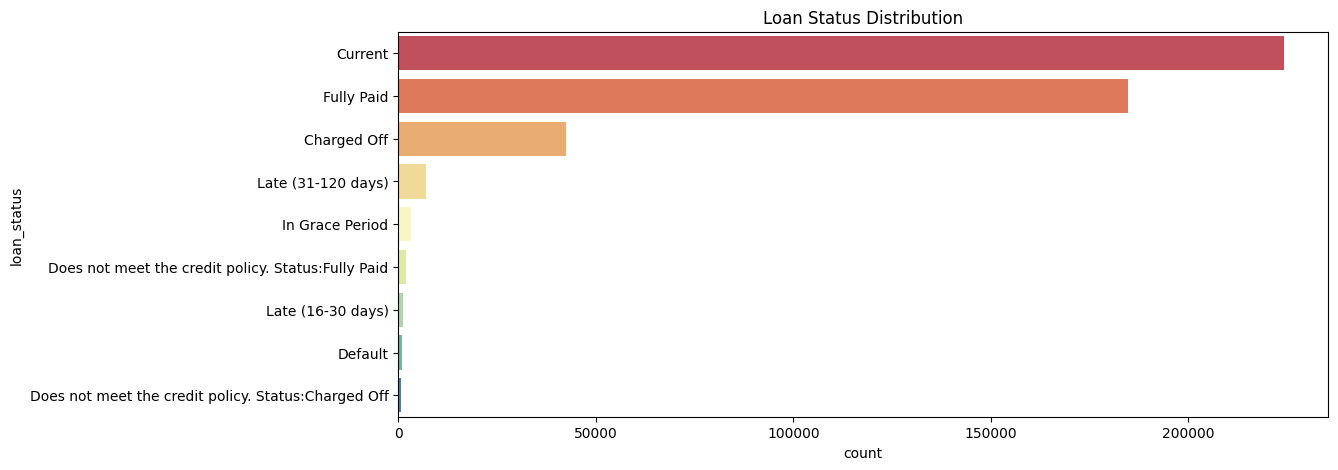

In [11]:
value_counts = df['loan_status'].value_counts().sort_values(ascending = False)

target_percentage = value_counts / value_counts.sum()
target_percentage = target_percentage.apply(lambda x: "{:.2%}".format(x))

sorted_loan = df.loc[df['loan_status'].isin(target_percentage.index)]

plt.figure(figsize=(12, 5))
plt.title('Loan Status Distribution')
sns.countplot(y='loan_status', data = sorted_loan, palette = 'Spectral', order = target_percentage.index)
plt.show()

## Data Cleaning

Data that will be cleaned should have this criteria:

- Missing values > 40% will be dropped
- Unrelatable columns will be dropped
- Column 'Unnamed: 0' will be dropped
- Cleaning the data leakage from the dataset

In [12]:
# Drop the column named 'Unnamed: 0'
df.drop('Unnamed: 0', axis = 1, inplace = True)

We have to drop the unrelatable columns to make our models perform better and relevant to the data

In [13]:
# Drop the unrelate columns
unrelate_cols = ['id', 'member_id', 'url', 'addr_state', 'desc', 'zip_code', 'policy_code', 'title', 'application_type', 'emp_title']
df = df.drop(unrelate_cols, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 64 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_length                   445277 non-null  object 
 9   home_ownership               466285 non-null  object 
 10  annual_inc                   466281 non-null  float64
 11  verification_status          466285 non-null  object 
 12  issue_d                      466285 non-null  object 
 13 

### Cleaning the Data Leakage

In this case, the data in our columns are related to the current status of loan whereas we can only get those data after the loan is issued (after we invested to the loan). That is called data leakage in Data Science field. This kind of problem could affect our models performance. Thus, it would be better if we get rid of them.

In [14]:
#
leakage_col = ['issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

df.drop(columns=leakage_col, axis=1, inplace=True)

### Cleaning the Missing Values

In [15]:
missing_threshold = 50

cols_above_thres = missing_values_percentage[missing_values_percentage > missing_threshold].index
cols_to_drop = [col for col in cols_above_thres if col not in unrelate_cols]

# Dropping the missing values columns
df = df.drop(cols_to_drop, axis = 1)
print("After cleaning:")
df.info()

After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   sub_grade                   466285 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  loan_status                 466285 non-null  object 
 13

In [16]:
# Cleaning the columns where missing values below threshold
# Identify the categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

for col in categorical_cols:
  df[col].fillna(df[col].mode()[0], inplace = True)

for col in numerical_cols:
  df[col].fillna(df[col].median(), inplace = True)

print("Missing values:")
df.isnull().sum()

<ipython-input-16-2b4a77f4d3a9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace = True)
<ipython-input-16-2b4a77f4d3a9>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Missing values:


,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0


## Feature Engineering

Change the 'term' column cause it still has word 'months' behind the number.

In [17]:
# Check first the term column, because it's still have word 'months'
df['term'].value_counts()

,count
term,
36 months,337953
60 months,128332


In [18]:
df['term'] = df['term'].apply(lambda x: int(x[0:3]))
df['term']

,term
0,36
1,60
2,36
3,36
4,60
...,...
466280,60
466281,60
466282,60
466283,36


Using categorical encoding since we need numerical value for model prediction

In [19]:
# Convert the target columns so the model can easily predict (Using numerical)
goodLoans = ['Fully paid', 'Current', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']
df['loan_status'] = np.where(df['loan_status'].isin(goodLoans), 1, 0)

df['loan_status'].value_counts()

,count
loan_status,
0,236925
1,229360


Beside term, we still have another column that has similar case. The column named 'emp_length' contains word 'year' or 'years' after the number.

In [20]:
# Checking another columns named emp_length
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [21]:
emp_len_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

df['emp_length'] = df['emp_length'].map(emp_len_map).fillna('0').astype(int)
df['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

Checking the date columns to see if we can get any insight from it.

In [22]:
# Now, we're gonna check the date parts
df['earliest_cr_line']

,earliest_cr_line
0,Jan-85
1,Apr-99
2,Nov-01
3,Feb-96
4,Jan-96
...,...
466280,Apr-03
466281,Jun-97
466282,Dec-01
466283,Feb-03


In [23]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['earliest_cr_line_date']

,earliest_cr_line_date
0,1985-01-01
1,1999-04-01
2,2001-11-01
3,1996-02-01
4,1996-01-01
...,...
466280,2003-04-01
466281,1997-06-01
466282,2001-12-01
466283,2003-02-01


In [24]:
# Let's assume an date such as November 2018
df['mths_since_earliest_cr_line_date'] = round(pd.to_numeric((pd.to_datetime('2018-11-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'D') / 30))


In [25]:
# Now we have to check the statistic description about the new columns
df['mths_since_earliest_cr_line_date'].describe()

,mths_since_earliest_cr_line_date
count,466285.000000
mean,254.136133
std,95.342418
min,-610.000000
25%,197.000000
50%,240.000000
75%,300.000000
max,607.000000


Now, we see that the min value from the column is negative. So, we will take a look at that column

In [26]:
# Showing the row that has negative value
df.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line_date']][df['mths_since_earliest_cr_line_date'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line_date
1580,Sep-62,2062-09-01,-534.0
1770,Sep-68,2068-09-01,-607.0
2799,Sep-64,2064-09-01,-558.0
3282,Sep-67,2067-09-01,-595.0
3359,Feb-65,2065-02-01,-563.0
...,...,...,...
464003,Jan-68,2068-01-01,-599.0
464260,Jul-66,2066-07-01,-580.0
465100,Oct-67,2067-10-01,-596.0
465500,Sep-67,2067-09-01,-595.0


In [27]:
# Change the year from the rows with negative values from 20's into 19's
df['earliest_cr_line_date'] = df['earliest_cr_line_date'].astype(str)
df['earliest_cr_line_date'][df['mths_since_earliest_cr_line_date'] < 0] = df['earliest_cr_line_date'][df['mths_since_earliest_cr_line_date'] < 0].str.replace('20', '19')
# Dheck one of the data that is changed from 20's to 19's
df['earliest_cr_line_date'][628]

<ipython-input-27-949791de0319>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['earliest_cr_line_date'][df['mths_since_earliest_cr_line_date'] < 0] = df['earliest_cr_line_date'][df['mths_since_earliest_cr_line_date'] < 0].str.replace('2

'1993-12-01'

In [28]:
# Dheck one of the data that is changed from 20's to 19's
df['earliest_cr_line_date'][628]

'1993-12-01'

In [29]:
# Turn it to datetime again
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line_date'])
df['earliest_cr_line_date']

,earliest_cr_line_date
0,1985-01-01
1,1999-04-01
2,2001-11-01
3,1996-02-01
4,1996-01-01
...,...
466280,2003-04-01
466281,1997-06-01
466282,2001-12-01
466283,2003-02-01


In [30]:
df['last_credit_pull_d']

,last_credit_pull_d
0,Jan-16
1,Sep-13
2,Jan-16
3,Jan-15
4,Jan-16
...,...
466280,Jan-16
466281,Jan-16
466282,Dec-15
466283,Apr-15


In [31]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')
df['last_credit_pull_d']

,last_credit_pull_d
0,2016-01-01
1,2013-09-01
2,2016-01-01
3,2015-01-01
4,2016-01-01
...,...
466280,2016-01-01
466281,2016-01-01
466282,2015-12-01
466283,2015-04-01


In [32]:
# Fill the missing value with max date
df['last_credit_pull_d'].fillna("2016-01-01")

,last_credit_pull_d
0,2016-01-01
1,2013-09-01
2,2016-01-01
3,2015-01-01
4,2016-01-01
...,...
466280,2016-01-01
466281,2016-01-01
466282,2015-12-01
466283,2015-04-01


In [33]:
# Assume we're in 2017
df['mths_since_last_credit_pull'] = round(pd.to_numeric((pd.to_datetime('2017-01-01') - df['last_credit_pull_d']) / np.timedelta64(1, 'D') / 30))

# Show the statistical description about the column
df['mths_since_last_credit_pull'].describe()

,mths_since_last_credit_pull
count,466285.000000
mean,16.119937
std,9.858359
min,12.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,118.000000


## EDA

In EDA, we should see first each correlation between those features. After we check the correlation then we can jump to see if there's any insights between columns with mid to strong correlation.

In [34]:
# First, to see the corr mapping, collect the columns with numerical data type
nums = df.select_dtypes(include = np.number).columns.tolist()
print(nums)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'mths_since_earliest_cr_line_date', 'mths_since_last_credit_pull']


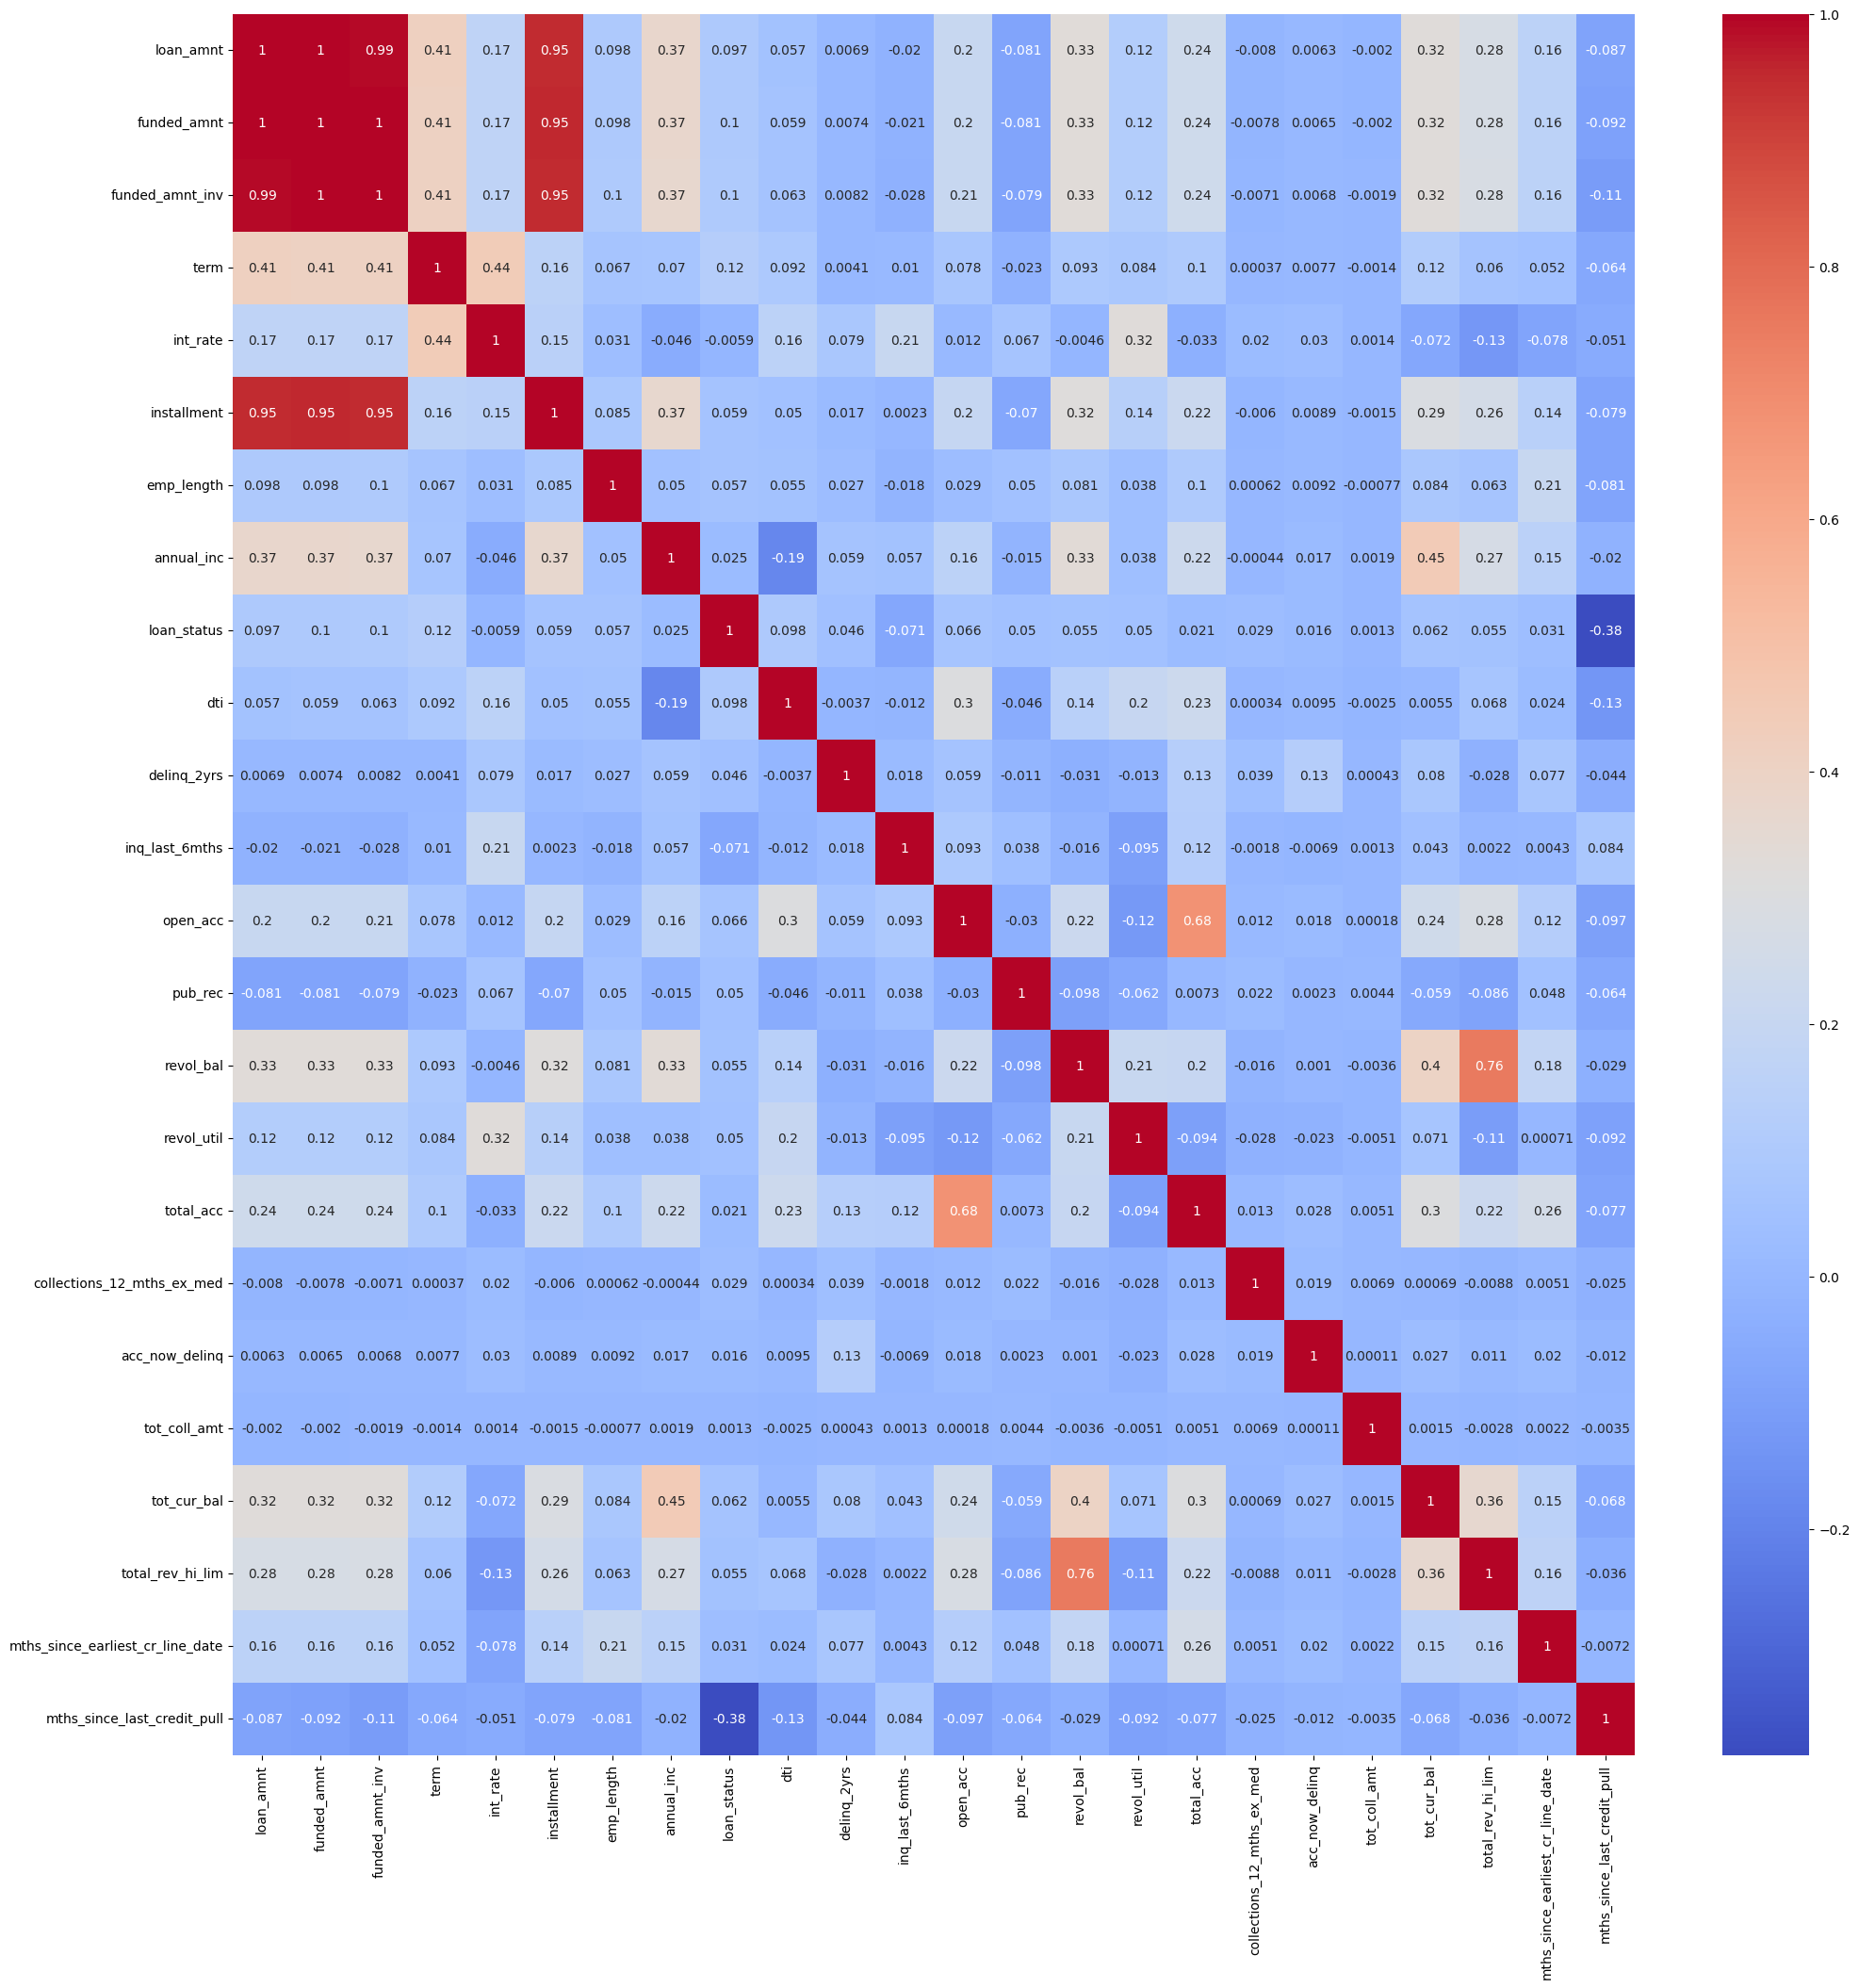

In [35]:
# Perform the correlation heatmap
plt.figure(figsize=(24, 24))
df_numeric = df[nums]
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

Since this data is about loan investment risk, we have to perform a function that will show us about the risk visualization using line graph

In [36]:
# Create a function to visualize the risk percentage from each col that we set
def risk_visual(col):
  ratio = (df.groupby(col)['loan_status']
           .value_counts(normalize=True)
           .mul(100)
           .rename('Risk (%)')
           .reset_index()
           )

  sns.lineplot(data = ratio[ratio['loan_status'] == 0], x = col, y = 'Risk (%)')
  plt.title(col)
  plt.show()


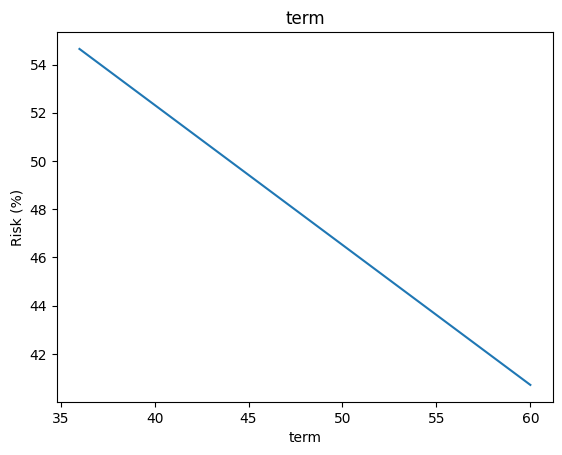

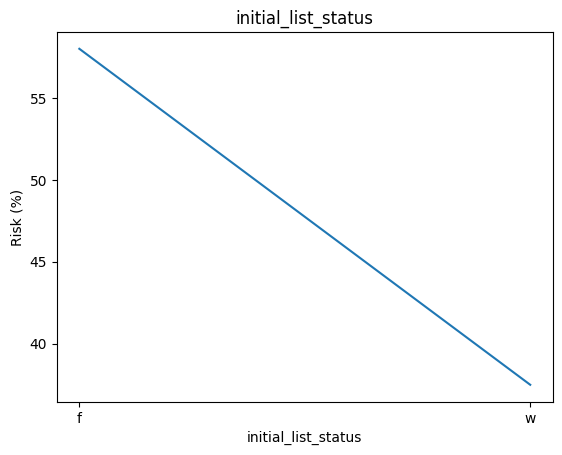

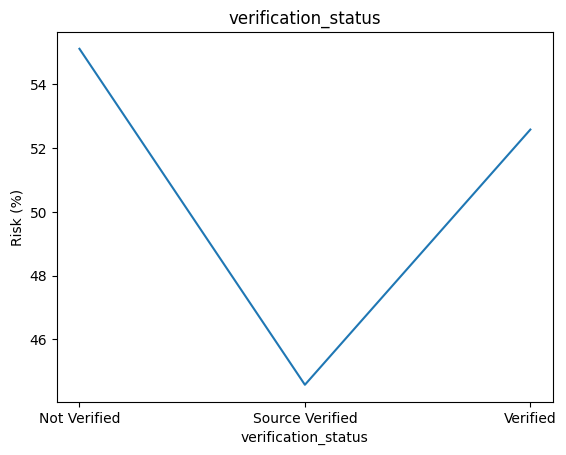

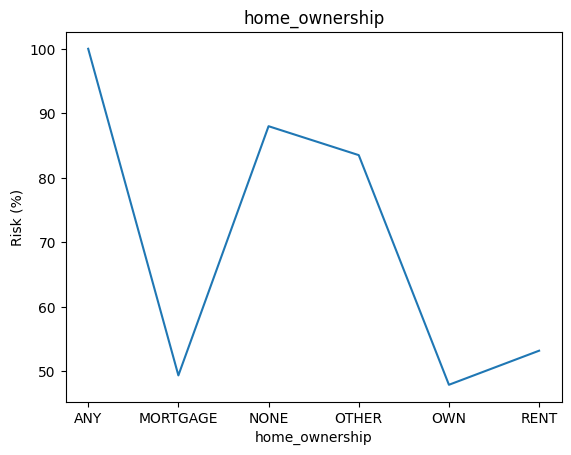

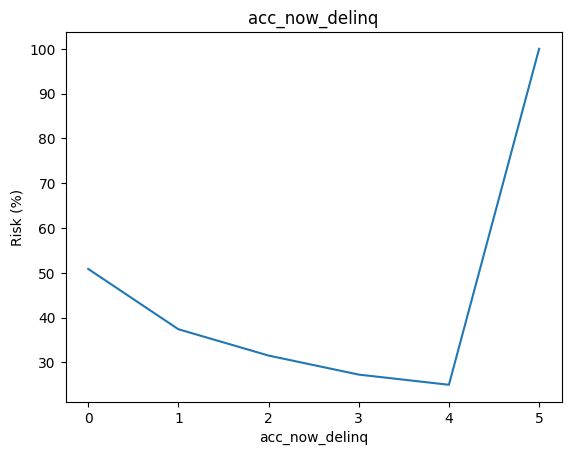

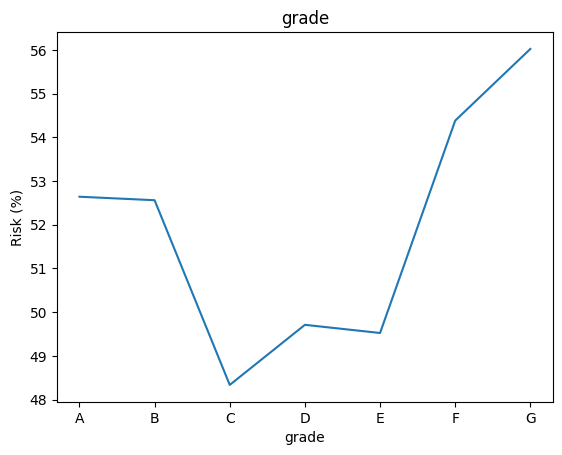

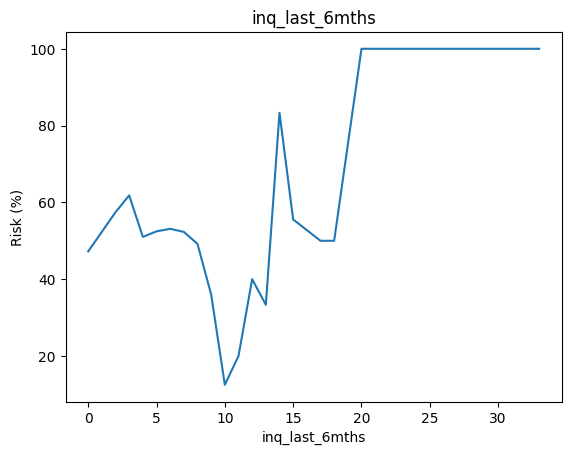

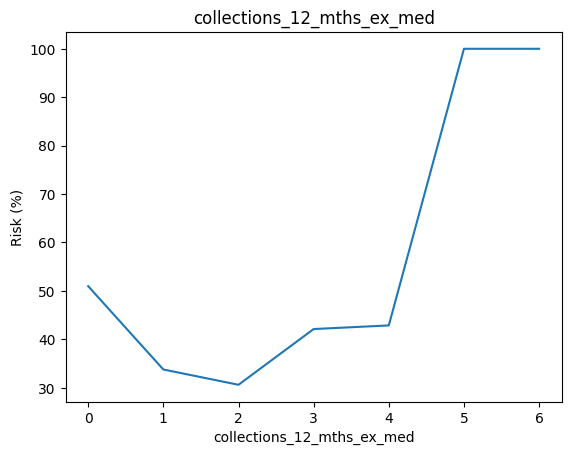

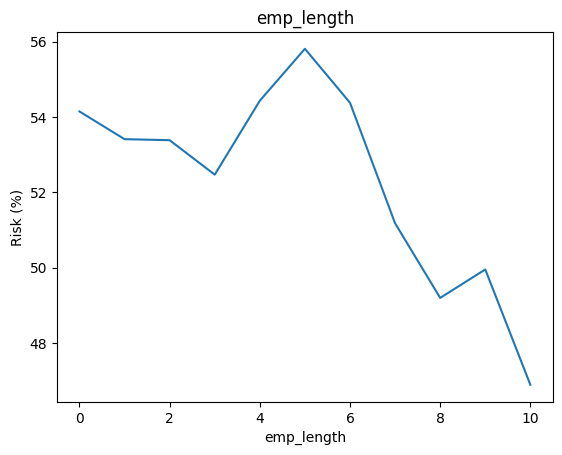

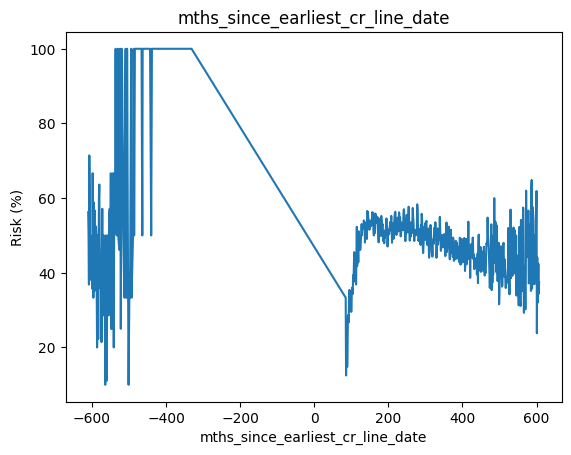

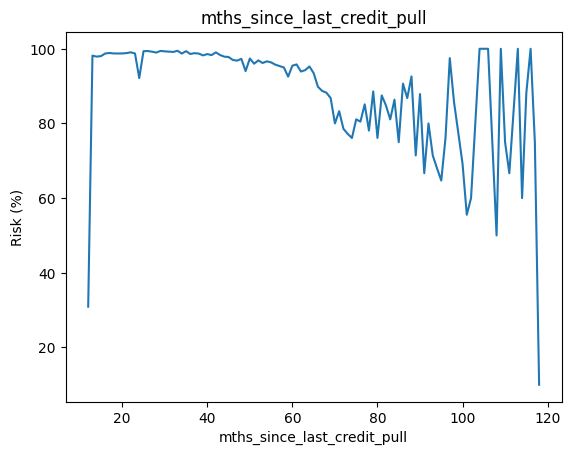

In [37]:
# Unique columns and months date column
unq_cols = ['term', 'initial_list_status', 'verification_status',
       'home_ownership', 'acc_now_delinq', 'grade', 'inq_last_6mths',
       'collections_12_mths_ex_med', 'emp_length', 'mths_since_earliest_cr_line_date', 'mths_since_last_credit_pull']

for col in unq_cols:
  risk_visual(col)

In the dataset, there are some categorical column that are still in object type. In order to perform a good model, we have to convert them using Encoding to the categorical columns.

In [38]:
# Collect the columns with object datatype to convert those into categorical by One Hot Encoding
obj = df.select_dtypes(include = 'object').columns.tolist()
df_obj = df[obj]
df_obj

,grade,sub_grade,home_ownership,verification_status,purpose,earliest_cr_line,initial_list_status
0,B,B2,RENT,Verified,credit_card,Jan-85,f
1,C,C4,RENT,Source Verified,car,Apr-99,f
2,C,C5,RENT,Not Verified,small_business,Nov-01,f
3,C,C1,RENT,Source Verified,other,Feb-96,f
4,B,B5,RENT,Source Verified,other,Jan-96,f
...,...,...,...,...,...,...,...
466280,C,C2,MORTGAGE,Source Verified,debt_consolidation,Apr-03,w
466281,D,D5,MORTGAGE,Verified,debt_consolidation,Jun-97,f
466282,D,D1,MORTGAGE,Verified,debt_consolidation,Dec-01,f
466283,A,A4,OWN,Verified,credit_card,Feb-03,w


In [39]:
# Convert the categorical column with one hot
from sklearn.preprocessing import OneHotEncoder

categoric_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]
onehot_col = pd.get_dummies(df[categoric_cols], drop_first = True).astype(int)

onehot_col

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,...,earliest_cr_line_Sep-91,earliest_cr_line_Sep-92,earliest_cr_line_Sep-93,earliest_cr_line_Sep-94,earliest_cr_line_Sep-95,earliest_cr_line_Sep-96,earliest_cr_line_Sep-97,earliest_cr_line_Sep-98,earliest_cr_line_Sep-99,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
466281,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466282,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
466283,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
#
from sklearn.preprocessing import StandardScaler

date_col = ['last_credit_pull_d', 'earliest_cr_line_date']

numeric_col = [col for col in df.columns.tolist() if col not in categoric_cols + date_col + ['loan_status']]
sscaler = StandardScaler()
standard_col = pd.DataFrame(sscaler.fit_transform(df[numeric_col]), columns = numeric_col)
standard_col

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line_date,mths_since_last_credit_pull
0,-1.124392,-1.122963,-1.114455,-0.616225,-0.729587,-1.105575,1.050991,-0.896549,1.328632,-0.357012,...,-0.124888,1.160093,-1.384880,-0.083608,-0.058307,-0.012089,-0.343273,-0.186939,1.655759,-0.417914
1,-1.426088,-1.425101,-1.412732,1.622784,0.330634,-1.528763,-1.695869,-0.787386,-2.065791,-0.357012,...,-0.703378,-1.971760,-1.815923,-0.083608,-0.058307,-0.012089,-0.343273,-0.186939,-0.169244,2.523756
2,-1.438156,-1.437186,-1.424784,-0.616225,0.488979,-1.428140,1.050991,-1.110292,-1.082491,-0.357012,...,-0.642003,1.783934,-1.298671,-0.083608,-0.058307,-0.012089,-0.343273,-0.186939,-0.494388,-0.417914
3,-0.521001,-0.518687,-0.508860,-0.616225,-0.077850,-0.380931,1.050991,-0.438061,0.354248,-0.357012,...,-0.514224,-1.482803,1.028959,-0.083608,-0.058307,-0.012089,-0.343273,-0.186939,0.239808,0.799329
4,-1.365749,-1.364673,-1.352474,1.622784,-0.261438,-1.496071,-1.421183,0.122313,0.091865,-0.357012,...,0.558748,-0.096020,1.115168,-0.083608,-0.058307,-0.012089,-0.343273,-0.186939,0.250297,-0.417914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0.492696,0.496497,0.503478,1.622784,0.147046,0.002377,-0.597125,0.668132,0.335143,-0.357012,...,0.337479,0.902969,0.942751,-0.083608,-0.058307,-0.012089,1.163432,0.019261,-0.672693,-0.417914
466281,0.927137,0.931576,0.937336,1.622784,1.409214,0.617856,1.050991,0.085925,0.156824,-0.357012,...,0.097107,-0.416371,0.425499,-0.083608,-0.058307,-0.012089,0.646974,0.295162,0.071992,-0.417914
466282,0.770256,0.774464,0.780665,1.622784,0.725348,0.337921,0.226933,-0.496282,1.073891,-0.357012,...,-0.461506,-0.214044,1.546210,-0.083608,-0.058307,-0.012089,-0.399324,-0.468649,-0.504877,-0.316477
466283,-1.486427,-1.485528,-1.472991,-0.616225,-1.360671,-1.517427,-0.871811,0.176895,-1.506635,3.405486,...,-0.233418,-1.461727,0.166874,-0.083608,-0.058307,-0.012089,3.257074,0.693041,-0.651716,0.495018


In [41]:
# Combining column
combined_df = pd.concat([onehot_col, standard_col, df[['loan_status']]], axis=1)
combined_df.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,...,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line_date,mths_since_last_credit_pull,loan_status
0,1,0,0,0,0,0,0,0,0,0,...,1.160093,-1.384880,-0.083608,-0.058307,-0.012089,-0.343273,-0.186939,1.655759,-0.417914,0
1,0,1,0,0,0,0,0,0,0,0,...,-1.971760,-1.815923,-0.083608,-0.058307,-0.012089,-0.343273,-0.186939,-0.169244,2.523756,0
2,0,1,0,0,0,0,0,0,0,0,...,1.783934,-1.298671,-0.083608,-0.058307,-0.012089,-0.343273,-0.186939,-0.494388,-0.417914,0
3,0,1,0,0,0,0,0,0,0,0,...,-1.482803,1.028959,-0.083608,-0.058307,-0.012089,-0.343273,-0.186939,0.239808,0.799329,0
4,1,0,0,0,0,0,0,0,0,0,...,-0.096020,1.115168,-0.083608,-0.058307,-0.012089,-0.343273,-0.186939,0.250297,-0.417914,1


In [42]:
# Split the dataset into X and y for modelling step
X = combined_df.drop('loan_status', axis = 1)
y = combined_df['loan_status']

In [43]:
# Splitting the data X and y to training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373028, 747), (93257, 747), (373028,), (93257,))

s

<Axes: title={'center': 'Good (1) vs Bad (0) Loans'}, xlabel='loan_status'>

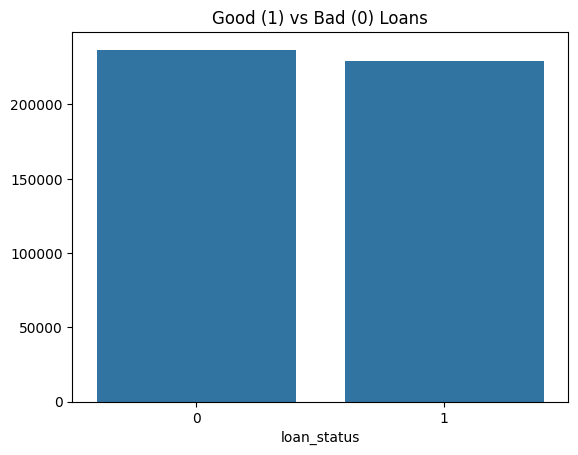

In [45]:
# Checking if the sampels are balanced
plt.title("Good (1) vs Bad (0) Loans")
sns.barplot(
    x = combined_df.loan_status.value_counts().index,
    y = combined_df.loan_status.value_counts().values,
)

## Modeling

In [46]:
# Import Library
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, make_scorer, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [47]:
# Training
log_res = LogisticRegression(max_iter=600)
log_res.fit(X_train, y_train)

#predicting
y_pred_log = log_res.predict(X_test)

#classification report
target_names = ['Bad loan', 'Good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_log, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    Bad loan     0.8490    0.6407    0.7303     47333
   Good loan     0.7044    0.8825    0.7835     45924

    accuracy                         0.7598     93257
   macro avg     0.7767    0.7616    0.7569     93257
weighted avg     0.7778    0.7598    0.7565     93257



In [49]:
# Random Forest Model
rf = RandomForestClassifier(max_depth=10, n_estimators=20)
rf.fit(X_train, y_train)

#predicting
y_pred_rf = rf.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_rf, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.9141    0.6720    0.7745     47333
   good loan     0.7344    0.9349    0.8226     45924

    accuracy                         0.8014     93257
   macro avg     0.8242    0.8034    0.7986     93257
weighted avg     0.8256    0.8014    0.7982     93257



In [50]:
# DecisionTree Model
dec_tree = DecisionTreeClassifier(max_depth = 10)
dec_tree.fit(X_train, y_train)

#predicting
y_pred_tree = dec_tree.predict(X_test)

#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_tree, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.9427    0.6787    0.7892     47333
   good loan     0.7430    0.9575    0.8367     45924

    accuracy                         0.8160     93257
   macro avg     0.8428    0.8181    0.8130     93257
weighted avg     0.8444    0.8160    0.8126     93257



In [51]:
# XGBClassifier Model
xgb = XGBClassifier(max_depth=5)
xgb.fit(X_train, y_train)

#predicting
y_pred_xgb = xgb.predict(X_test)

#classification report
target_names = ['Bad loan', 'Good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_xgb, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    Bad loan     0.9261    0.7142    0.8065     47333
   Good loan     0.7616    0.9413    0.8420     45924

    accuracy                         0.8260     93257
   macro avg     0.8439    0.8277    0.8242     93257
weighted avg     0.8451    0.8260    0.8239     93257



## Evaluation

In [52]:
#classification report
target_names = ['Bad loan', 'Good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_log, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    Bad loan     0.8490    0.6407    0.7303     47333
   Good loan     0.7044    0.8825    0.7835     45924

    accuracy                         0.7598     93257
   macro avg     0.7767    0.7616    0.7569     93257
weighted avg     0.7778    0.7598    0.7565     93257



Logistic Regression performed the worst among all models, with an accuracy of 75.98%. It had a decent precision of 0.8490 for "Bad loan," but its recall was significantly lower at 0.6407, indicating that it struggled to capture all bad loans. On the other hand, it had a high recall for "Good loan" (0.8825), meaning it was effective in identifying most good loans.

In [53]:
#classification report
target_names = ['Bad loan', 'Good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_rf, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    Bad loan     0.9141    0.6720    0.7745     47333
   Good loan     0.7344    0.9349    0.8226     45924

    accuracy                         0.8014     93257
   macro avg     0.8242    0.8034    0.7986     93257
weighted avg     0.8256    0.8014    0.7982     93257



The Random Forest model showed improvements, achieving an accuracy of 80.14%. Its recall for "Good loan" was high at 0.9349, but for "Bad loan," it remained relatively low at 0.6720.

In [54]:
#classification report
target_names = ['bad loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_tree, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    bad loan     0.9427    0.6787    0.7892     47333
   good loan     0.7430    0.9575    0.8367     45924

    accuracy                         0.8160     93257
   macro avg     0.8428    0.8181    0.8130     93257
weighted avg     0.8444    0.8160    0.8126     93257



Decision Tree model performed even better, with an accuracy of 81.60%. It had the highest precision for "Bad loan" at 0.9427 and a recall of 0.9575 for "Good loan," indicating strong predictive power. However, decision trees are prone to overfitting, which might explain its strong performance on the test set.

In [55]:
#classification report
target_names = ['Bad loan', 'Good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_xgb, digits=4, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

    Bad loan     0.9261    0.7142    0.8065     47333
   Good loan     0.7616    0.9413    0.8420     45924

    accuracy                         0.8260     93257
   macro avg     0.8439    0.8277    0.8242     93257
weighted avg     0.8451    0.8260    0.8239     93257



XGBoost delivered the best performance with an accuracy of 82.60%. It significantly improved recall for "Bad loan" (0.7142) while maintaining a high recall for "Good loan" (0.9413). This balance between precision and recall makes XGBoost the most reliable model for loan risk classification.

Conclusion:
XGBoost emerged as the best-performing model, achieving an accuracy of 82.60%. It demonstrated a significant improvement in recall for "Bad loan" (0.7142) while maintaining a high recall for "Good loan" (0.9413). This balance between precision and recall makes it the most reliable model for loan risk classification. Due to its superior performance and ability to handle imbalanced data effectively, XGBoost is the recommended model. However, before final deployment, further hyperparameter tuning and validation should be considered to enhance its robustness.